In [66]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,25)
import contextily as cx
import numpy as np


In [38]:
gdf = pd.read_csv('../data/570_trafikkulykke-eksport.csv', delimiter = ';',low_memory=False)

In [39]:
kolonner_i_datasettet = gdf.columns.values.tolist()
print(kolonner_i_datasettet)

['VEGOBJEKT-ID', 'TYPE-ID', 'VERSJON', 'FØRSTE FOREKOMST', 'STARTDATO', 'SLUTTDATO', 'SIST MODIFISERT', 'ALTERNATIV UHELLSKODE', 'ALVORLIGHETSGRAD', 'ANMELDELSESNUMMER', 'ANTALL ALVORLIG SKADET (STK)', 'ANTALL ANDRE ENHETER (NY) (STK)', 'ANTALL BUSS (NY) (STK)', 'ANTALL DREPTE I ULYKKEN (STK)', 'ANTALL ENHETER (STK)', 'ANTALL FOTGJENGERE (NY) (STK)', 'ANTALL KJØREFELT (STK)', 'ANTALL LASTEBIL (NY) (STK)', 'ANTALL LETT MC (NY) (STK)', 'ANTALL LETTERE SKADET (STK)', 'ANTALL MC (NY) (STK)', 'ANTALL MEGET ALVORLIG SKADET (STK)', 'ANTALL MOPED (NY) (STK)', 'ANTALL PERSONBIL (NY) (STK)', 'ANTALL SKINNEGÅENDE MATERIELL (NY) (STK)', 'ANTALL SYKKEL (NY) (STK)', 'ANTALL TRAKTOR (NY) (STK)', 'ANTALL UKJENTE ENHETER (NY) (STK)', 'ANTALL VAREBIL (NY) (STK)', 'ATK, INFLUENSSTREKNING (NY)', 'BESKRIVELSE', 'DEKKETYPE', 'FARTSDEMPENDE TILTAK (NY)', 'FARTSGRENSE (KM/H)', 'FORSTERKET VEGOPPMERKING', 'FYLKENAVN (NY)', 'FYLKENUMMER (NY)', 'FØREFORHOLD', 'GEOMETRI, PUNKT', 'HISTORISK ARM (NY)', 'HISTORISK H

In [97]:
gdf['ÅR (NY)'].describe()

count    290392.000000
mean       1997.979114
std          11.067840
min        1977.000000
25%        1989.000000
50%        1998.000000
75%        2007.000000
max        2020.000000
Name: ÅR (NY), dtype: float64

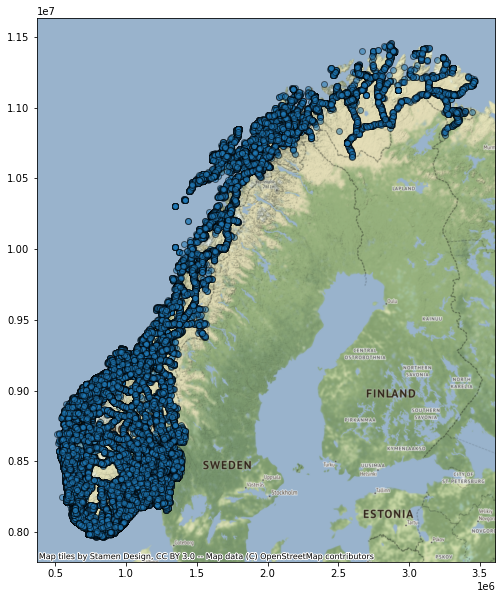

In [40]:
gs = geopandas.GeoSeries.from_wkt(gdf['GEOMETRI'])
#Lager geometri kolonne og setter riktig referansesystem
gdf = geopandas.GeoDataFrame(gdf, geometry=gs, crs="EPSG:5973")
# Konverterer koordinatene til samme format som kartet som vi henter eksternt
gdf = gdf.to_crs(epsg=3857)
# Sletter dataframes for å frigjør plass i minne
#del(df)
del(gs)
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

<AxesSubplot:xlabel='FARTSGRENSE (KM/H)'>

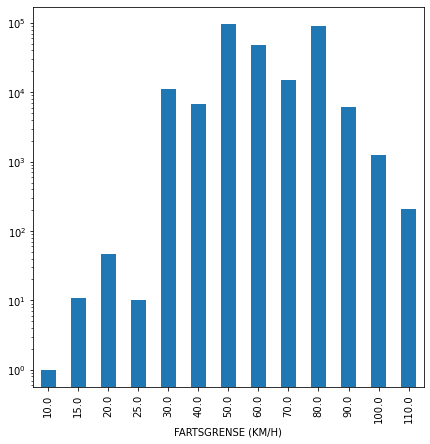

In [55]:
gdf_guppert_fartsgrense = gdf.groupby("FARTSGRENSE (KM/H)")["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(7,7), logy=True)

<AxesSubplot:ylabel='Frequency'>

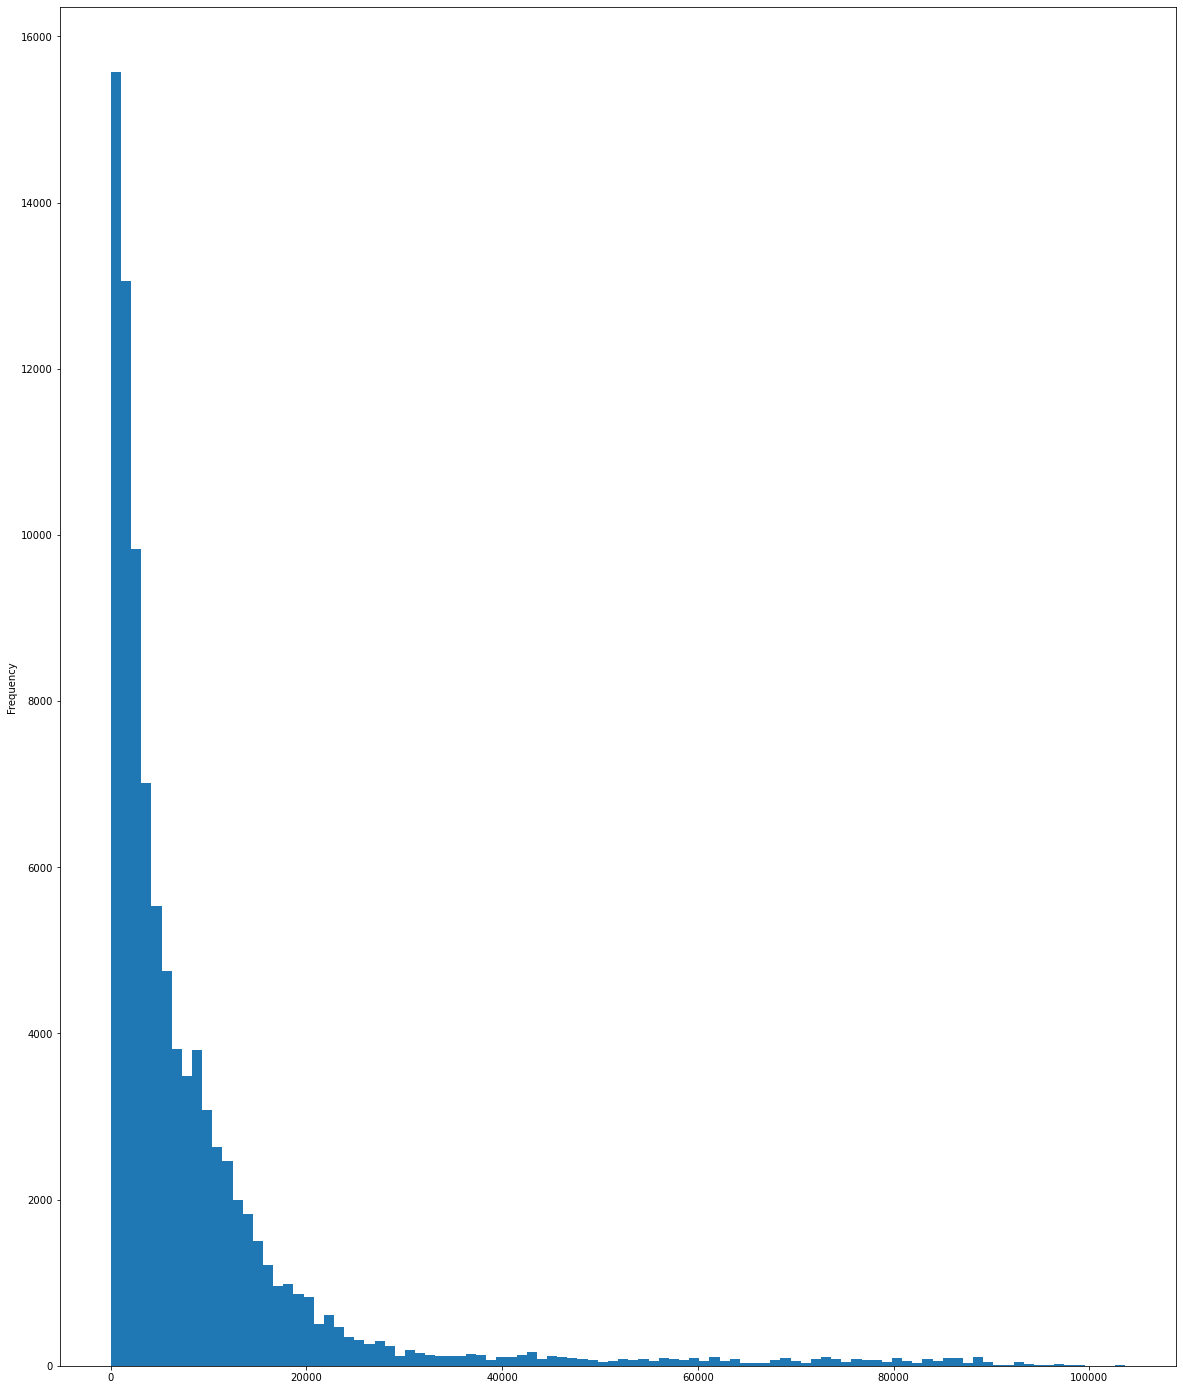

In [57]:
gdf["ÅDT (NY)"].plot(kind="hist", bins=100)

In [85]:
gdf["ÅDT (NY)"][gdf["ÅDT (NY)"]<100]

gdf["ÅDT (NY)"].fillna(0, inplace=True)

bins = [0, 100, 250, 1000, 20000]
names = ['Boliggate', 'Landeveg', 'Transportveg', 'Hoytrafikert']
d = dict(enumerate(names, 1))

gdf['AADT range'] = np.vectorize(d.get)(np.digitize(gdf["ÅDT (NY)"], bins))
gdf['AADT range']

0         Transportveg
1         Hoytrafikert
2         Transportveg
3         Transportveg
4         Hoytrafikert
              ...     
290447    Hoytrafikert
290448    Hoytrafikert
290449    Transportveg
290450       Boliggate
290451       Boliggate
Name: AADT range, Length: 290452, dtype: object

<AxesSubplot:xlabel='AADT range,FARTSGRENSE (KM/H)'>

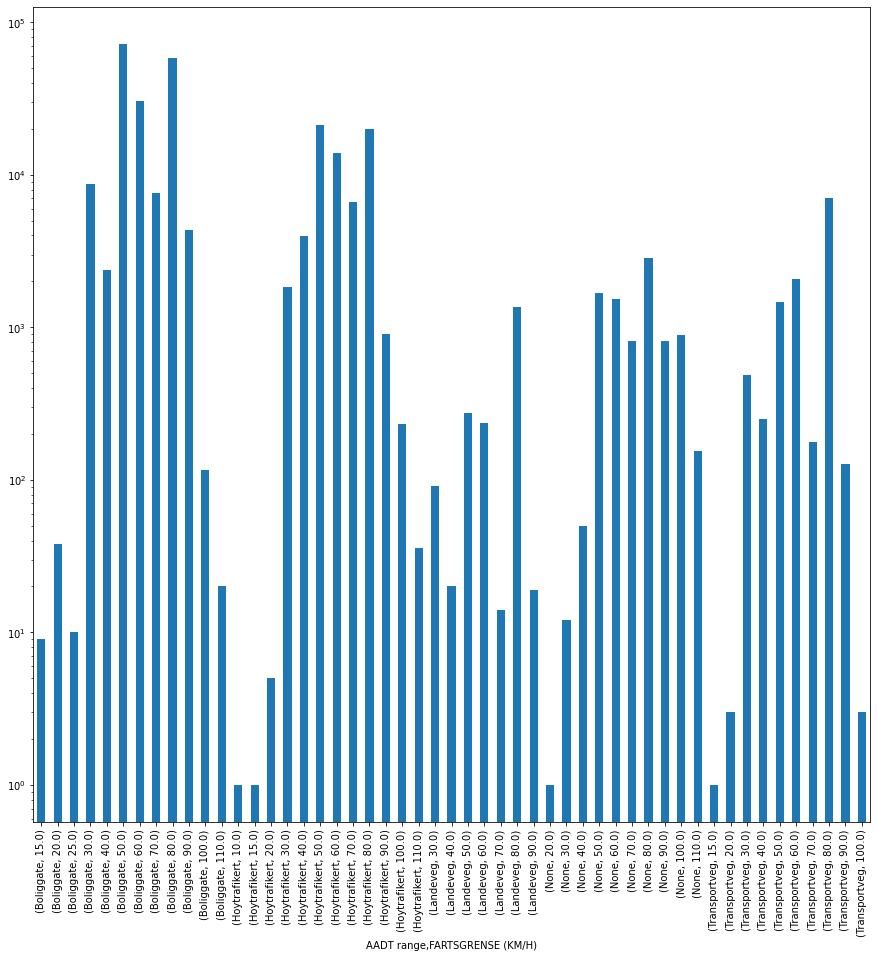

In [93]:
gdf_guppert_fartsgrense = gdf.groupby(['AADT range', "FARTSGRENSE (KM/H)"])["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(15,15), logy=True)

In [105]:
gdf['FØREFORHOLD'].describe()
gdf.groupby('FØREFORHOLD')["VEGOBJEKT-ID"].count()


FØREFORHOLD
Delvis snø / isbelagt veg     17869
Glatt ellers                   4960
Snø / isbelagt veg            40554
Tørr, bar veg                152971
Ukjent                        10947
Våt, bar veg                  62305
Name: VEGOBJEKT-ID, dtype: int64

In [106]:
gdf['LYSFORHOLD'].describe()
gdf.groupby('LYSFORHOLD')["VEGOBJEKT-ID"].count()


LYSFORHOLD
Dagslys                    195184
Mørkt med vegbelysning      45452
Mørkt uten vegbelysning     26429
Tussmørke, skumring         15819
Ukjent                       1953
Name: VEGOBJEKT-ID, dtype: int64

In [107]:

gdf['ANTALL ENHETER (STK)'].describe()
gdf.groupby('ANTALL ENHETER (STK)')["VEGOBJEKT-ID"].count()

ANTALL ENHETER (STK)
1.0      89195
2.0     179731
3.0      17250
4.0       3260
5.0        701
6.0        183
7.0         69
8.0         21
9.0         15
10.0         9
11.0         6
14.0         2
15.0         2
17.0         1
18.0         1
20.0         3
26.0         1
29.0         1
Name: VEGOBJEKT-ID, dtype: int64

In [110]:
gdf[gdf['ANTALL ENHETER (STK)']==26]

,VEGOBJEKT-ID,TYPE-ID,VERSJON,FØRSTE FOREKOMST,STARTDATO,SLUTTDATO,SIST MODIFISERT,ALTERNATIV UHELLSKODE,ALVORLIGHETSGRAD,ANMELDELSESNUMMER,...,TIL METER,VEGLENKESEKVENSID,STARTPOSISJON,SLUTTPOSISJON,RETNING,SIDEPOSISJON,TYPEVEG,GEOMETRI,geometry,AADT range
65345,83395373,570.0,1.0,1.0,2001-02-28,NaN,2021-09-08T22:10:36,NaN,NaN,NaN,...,"11466,975",443151.0,"0,50307896","0,50307896",NaN,NaN,enkelBilveg,POINT Z(260089.688 6625664.1 40.552),POINT Z (1195067.070 8333144.869 40.552),Boliggate


<AxesSubplot:xlabel='VÆRFORHOLD,ÅR (NY)'>

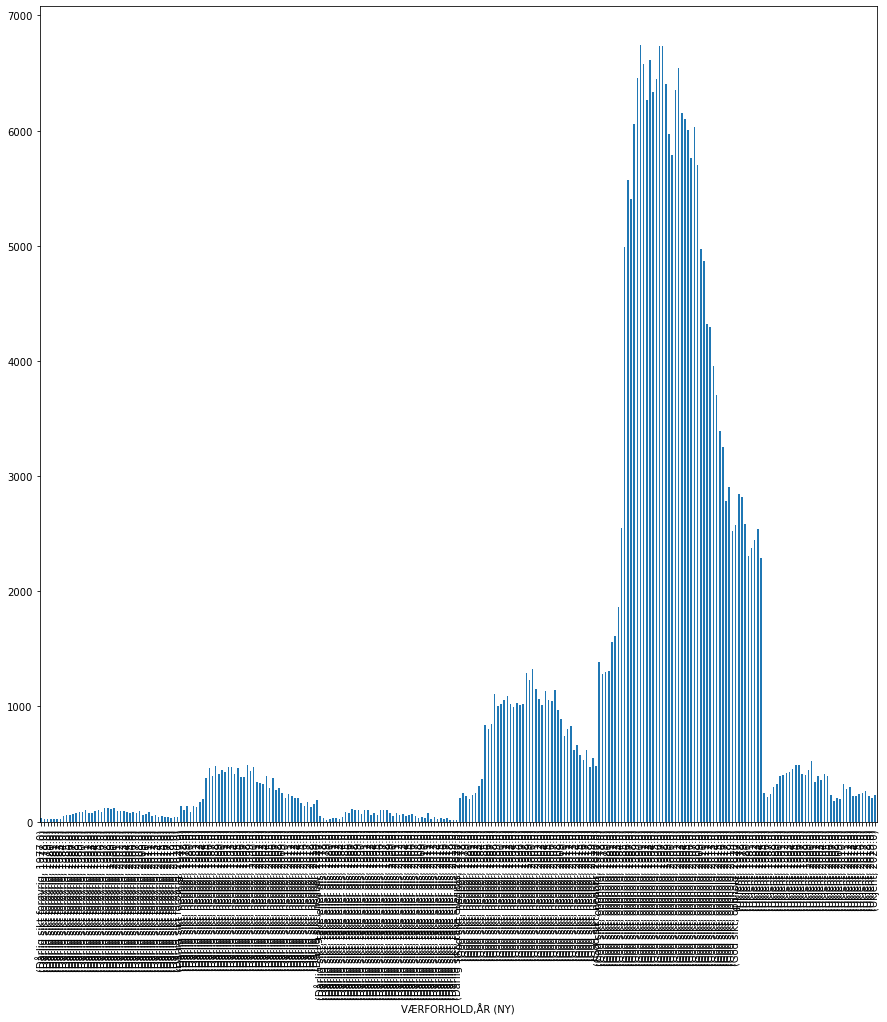

In [101]:
gdf['ÅR (NY)']
gdf_guppert_fartsgrense = gdf.groupby(['VÆRFORHOLD', 'ÅR (NY)'])["VEGOBJEKT-ID"].count()
#Plotter men på logaritmisk skala
gdf_guppert_fartsgrense.plot(kind='bar',figsize=(15,15))
